# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

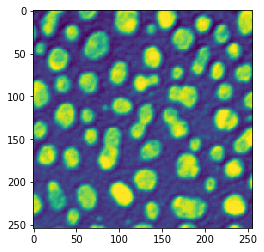

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')
blobs = cle.push(image)

cle.imshow(blobs)

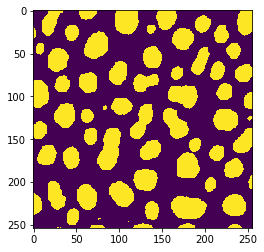

In [3]:
binary = cle.threshold_otsu(blobs)

cle.imshow(binary)

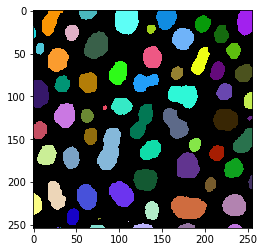

In [4]:
labels = cle.connected_components_labeling_box(binary)

cle.imshow(labels, labels=True)

# Quantitative maps a.k.a. parametric images
## Pixel count map

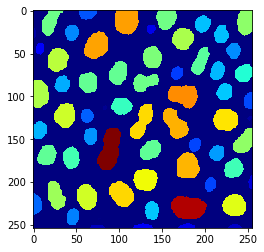

In [5]:
pixel_count_map = cle.label_pixel_count_map(labels)

cle.imshow(pixel_count_map, color_map='jet')

## Extension ratio map
The extension ratio is a shape descriptor derived from the maximum distance of pixels to their object's centroid divided by the average distance of pixels to the centroid.

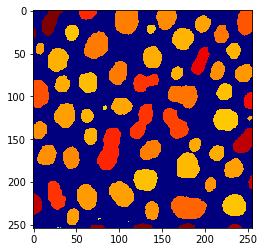

In [6]:
extension_ratio_map = cle.extension_ratio_map(labels)

cle.imshow(extension_ratio_map, color_map='jet')

## Mean / minimum / maximum / standard-deviation intensity map

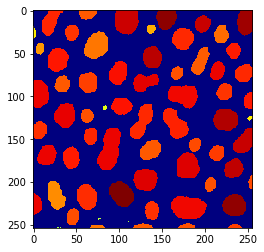

In [7]:
mean_intensity_map = cle.label_mean_intensity_map(blobs, labels)
cle.imshow(mean_intensity_map, color_map='jet')

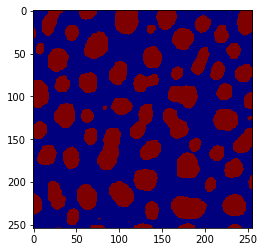

In [8]:
minimum_intensity_map = cle.minimum_intensity_map(blobs, labels)
cle.imshow(minimum_intensity_map, color_map='jet')

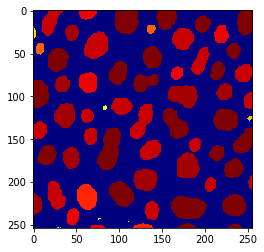

In [9]:
maximum_intensity_map = cle.maximum_intensity_map(blobs, labels)
cle.imshow(maximum_intensity_map, color_map='jet')

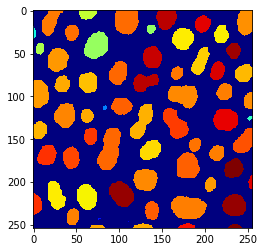

In [10]:
stddev_intensity_map = cle.standard_deviation_intensity_map(blobs, labels)
cle.imshow(stddev_intensity_map, color_map='jet')

## Neigbor count maps

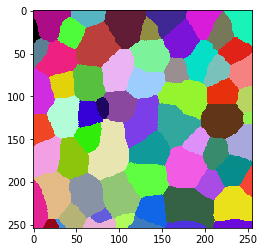

In [11]:
enlarged_labels = cle.extend_labeling_via_voronoi(labels)
cle.imshow(enlarged_labels, labels=True)

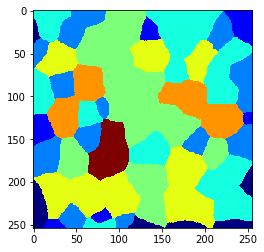

In [12]:
touching_neighbor_count_map = cle.touching_neighbor_count_map(enlarged_labels)
cle.imshow(touching_neighbor_count_map, color_map='jet')

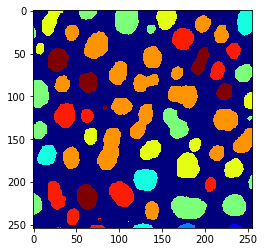

In [13]:
proximal_neighbor_count_map = cle.proximal_neighbor_count_map(labels, max_distance=50)
cle.imshow(proximal_neighbor_count_map, color_map='jet')

## Distance to neighbor maps

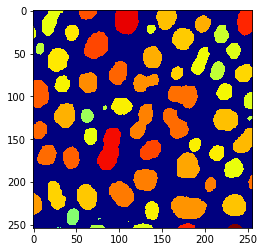

In [14]:
n_nearest_neighbor_distance_map = cle.average_distance_of_n_closest_neighbors_map(labels, n=3)
cle.imshow(n_nearest_neighbor_distance_map, color_map='jet')